This project is designed to provide students with hands-on experience simulating a real-world scenario in healthcare. The dataset includes a comprehensive set of physical and clinical parameters related to Polycystic Ovary Syndrome (PCOS) and infertility issues among women.


Dataset: PCOS data - https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos/data


Problem Statement:
Your goal is to develop a predictive model for the early detection of PCOS and infertility-related issues. PCOS is a complex hormonal disorder, and early diagnosis is crucial for effective management. Possible problem statements include predicting the likelihood of PCOS or identifying factors contributing to infertility based on the provided parameters.


Tasks:
Explore the PCOS dataset to understand its structure and features.
Identify missing values, outliers, and patterns in the data.
Select relevant physical and clinical parameters for PCOS and infertility detection.
Perform any necessary preprocessing steps, such as handling missing values or encoding categorical variables.
Choose appropriate machine learning models for binary classification (e.g., Logistic Regression)
Train the model on the training set and evaluate its performance on the testing set.
Explore different classification metrics (accuracy, precision, recall, F1 score).
Formulate hypotheses related to PCOS and infertility based on the dataset.
Use appropriate statistical tests to test these hypotheses.
Create visualizations to support your findings and enhance the interpretability of the model.
Summarize your results, including key insights into physical and clinical parameters associated with PCOS and infertility.



Suggested Timeline :

Week 1: Project introduction and Dataset Exploration
Team formation (4-5 students).
Introduction to the project, objectives, and PCOS dataset.
Dataset acquisition and initial exploration.

Week 2: Feature Exploration
Data manipulation using Numpy and Pandas.
Exploring the dataset.

Week 3-4: EDA & Visualization
Data manipulation using Numpy and Pandas.
Exploring EDA and visualization techniques.
Select relevant features and formulate the problem statement.

Week 5: Mid-Program Presentation
Present progress achieved till the EDA stage.
Receiving feedback and suggestions for further analysis.

Week 6: Initial Modeling
Begin experimenting with different ML models
Train Initial model and evaluate performance.

Week 7: Hypothesis Testing
Formulate hypothesis related to factors influencing infertility or medical complications.
Conduct hypothesis testing and statistical analysis.

Week 8: Final Model Training and Interpretation
Train final predictive models incorporating insights from previous analysis.
Interpret results, summarize key insights

Week 9: Final Presentation
Present methodology, results and insights


In [ ]:
# Before starting, make sure the Kaggle package is installed via pip (one-time setup)
# Use this to install:
# pip install kaggle

# Next, make sure to have your own Kaggle API ('kaggle.json'):
# Go to your Kaggle account -> Scroll down to "API" section -> Click "Create New API Token"
# File named 'kaggle.json' will download -> KEEP THIS SECURE
# Proceed with the following code


In [ ]:
from google.colab import files

# Select the 'kaggle.json' file that you downloaded
uploaded = files.upload()

KeyboardInterrupt: 

In [ ]:
import os

# Move the uploaded 'kaggle.json' file to the '.kaggle' directory
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/

# Download the dataset using the Kaggle API
!kaggle datasets download -d prasoonkottarathil/polycystic-ovary-syndrome-pcos

import zipfile

# Extract the downloaded ZIP file
with zipfile.ZipFile('polycystic-ovary-syndrome-pcos.zip', 'r') as zip_ref:
    zip_ref.extractall('/content/')



In [ ]:
## Importing packages

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
## Loading the File

# Loading the CSV file into a pandas df
pcos = pd.read_csv('/content/PCOS_infertility.csv')
columnName='Sl. No,Patient File No.,PCOS (Y/N),  I   beta-HCG(mIU/mL),II    beta-HCG(mIU/mL),AMH(ng/mL)'

# First few rows of the df
print(pcos.head())

   Sl. No  Patient File No.  PCOS (Y/N)    I   beta-HCG(mIU/mL)  \
0       1             10001           0                    1.99   
1       2             10002           0                   60.80   
2       3             10003           1                  494.08   
3       4             10004           0                    1.99   
4       5             10005           0                  801.45   

   II    beta-HCG(mIU/mL) AMH(ng/mL)  
0                    1.99       2.07  
1                    1.99       1.53  
2                  494.08       6.63  
3                    1.99       1.22  
4                  801.45       2.26  


In [ ]:
## Formating the Data

dataSize = len(pcos) # Number of rows
# Column names and values
slNum = [];
patientNum = [];
pcosBool = [];
iBetaHCG = [];
iiBetaHCG = [];
amh = [];

for i in range(dataSize):
  rowItem = pcos.iloc[i]
  # Add column values into their respective array
  slNum.append(rowItem['Sl. No']);
  patientNum.append(rowItem['Patient File No.']);
  pcosBool.append(rowItem['PCOS (Y/N)']);
  iBetaHCG.append(rowItem['  I   beta-HCG(mIU/mL)']);
  iiBetaHCG.append(rowItem['II    beta-HCG(mIU/mL)']);
  amh.append(rowItem['AMH(ng/mL)']);
# Create data
data = {
    'SL No.': slNum,
    'Patient No.': patientNum,
    'PCOS': pcosBool,
    'I Beta HCG': iBetaHCG,
    'II Beta HCG': iiBetaHCG,
    'AMH': amh
}
pcosDf = pd.DataFrame(data);

print(pcosDf);

     SL No.  Patient No.  PCOS  I Beta HCG  II Beta HCG   AMH
0         1        10001     0        1.99         1.99  2.07
1         2        10002     0       60.80         1.99  1.53
2         3        10003     1      494.08       494.08  6.63
3         4        10004     0        1.99         1.99  1.22
4         5        10005     0      801.45       801.45  2.26
..      ...          ...   ...         ...          ...   ...
536     537        10537     0        1.99         1.99   1.7
537     538        10538     0       80.13         1.99   5.6
538     539        10539     0        1.99         1.99   3.7
539     540        10540     0      292.92         1.99   5.2
540     541        10541     1        1.99         1.99    20

[541 rows x 6 columns]


In [ ]:
## Cleaning the Data

# Cleaning up column names by removing leading and trailing spaces
pcos.columns = pcos.columns.str.strip()

# Rename columns for easier access
pcos.rename(columns={
    'Sl. No': 'Sl_No',
    'Patient File No.': 'Patient_File_No',
    'PCOS (Y/N)': 'PCOS',
    'I   beta-HCG(mIU/mL)': 'I_Beta_HCG_mIU_per_mL',
    'II    beta-HCG(mIU/mL)': 'II_Beta_HCG_mIU_per_mL',
    'AMH(ng/mL)': 'AMH_ng_per_mL'
}, inplace=True)

# Feature selection
selected_features = ['Sl_No', 'Patient_File_No', 'PCOS',
                     'I_Beta_HCG_mIU_per_mL', 'II_Beta_HCG_mIU_per_mL', 'AMH_ng_per_mL']
pcos = pcos[selected_features]

In [ ]:
## Removing the Outliers

from scipy import stats

# Calculate z-scores for 'I Beta HCG'
z_scores = stats.zscore(pcos['I_Beta_HCG_mIU_per_mL'])

# Define a threshold for outlier detection (z-score > 3)
threshold = 3

# Find outliers
outliers_indices = np.where(np.abs(z_scores) > threshold)[0]

# Remove outliers from the DataFrame
pcos_no_outliers = pcos.drop(outliers_indices)

# Calculate the interquartile range (IQR) for 'I Beta HCG'
Q1 = pcos['I_Beta_HCG_mIU_per_mL'].quantile(0.25)
Q3 = pcos['I_Beta_HCG_mIU_per_mL'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
pcos_no_outliers_i_beta_hcg = pcos[(pcos['I_Beta_HCG_mIU_per_mL'] >= lower_bound) & (pcos['I_Beta_HCG_mIU_per_mL'] <= upper_bound)]

# Check the shape of the DataFrame before and after removing outliers
print("Shape of I Beta HCG in DataFrame BEFORE removing outliers:", pcos.shape)
print("Shape of I Beta HCG in DataFrame AFTER removing outliers:", pcos_no_outliers_i_beta_hcg.shape)



#####


# Calculate z-scores for 'II Beta HCG'
z_scores_ii = stats.zscore(pcos['II_Beta_HCG_mIU_per_mL'])

# Define a threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Find outliers
outliers_indices_ii = np.where(np.abs(z_scores_ii) > threshold)[0]

# Remove outliers from the DataFrame
pcos_no_outliers_ii = pcos.drop(outliers_indices_ii)

# Calculate the IQR for 'II Beta HCG'
Q1_ii = pcos['II_Beta_HCG_mIU_per_mL'].quantile(0.25)
Q3_ii = pcos['II_Beta_HCG_mIU_per_mL'].quantile(0.75)
IQR_ii = Q3_ii - Q1_ii

# Define the lower and upper bounds
lower_bound_ii = Q1_ii - 1.5 * IQR_ii
upper_bound_ii = Q3_ii + 1.5 * IQR_ii

# Remove outliers
pcos_no_outliers_ii_beta_hcg = pcos[(pcos['II_Beta_HCG_mIU_per_mL'] >= lower_bound_ii) & (pcos['II_Beta_HCG_mIU_per_mL'] <= upper_bound_ii)]

# Check the shape of the DataFrame before and after removing outliers
print("Shape of II Beta HCG in DataFrame BEFORE removing outliers:", pcos.shape)
print("Shape of II Beta HCG in DataFrame AFTER removing outliers:", pcos_no_outliers_ii_beta_hcg.shape)


####


# Convert 'AMH_ng_per_mL' column to numeric -> convert non-numeric values to NaN
pcos['AMH_ng_per_mL'] = pd.to_numeric(pcos['AMH_ng_per_mL'], errors='coerce')

# Drop rows with NaN values in 'AMH_ng_per_mL' column
pcos = pcos.dropna(subset=['AMH_ng_per_mL'])

# Now calculate z-scores for 'AMH'
z_scores_amh = stats.zscore(pcos['AMH_ng_per_mL'])

# Define a threshold for outlier detection (e.g., z-score > 3)
threshold = 3

# Find outliers
outliers_indices_amh = np.where(np.abs(z_scores_amh) > threshold)[0]

# Remove outliers from the DataFrame
pcos_no_outliers_amh = pcos.drop(outliers_indices_amh)

# Calculate the IQR for 'AMH'
Q1_amh = pcos['AMH_ng_per_mL'].quantile(0.25)
Q3_amh = pcos['AMH_ng_per_mL'].quantile(0.75)
IQR_amh = Q3_amh - Q1_amh

# Define the lower and upper bounds
lower_bound_amh = Q1_amh - 1.5 * IQR_amh
upper_bound_amh = Q3_amh + 1.5 * IQR_amh

# Remove outliers
pcos_no_outliers_amh = pcos[(pcos['AMH_ng_per_mL'] >= lower_bound_amh) & (pcos['AMH_ng_per_mL'] <= upper_bound_amh)]

# Check the shape of the DataFrame before and after removing outliers
print("Shape of AMH in DataFrame BEFORE removing outliers:", pcos.shape)
print("Shape of AMH in DataFrame AFTER removing outliers:", pcos_no_outliers_amh.shape)


Shape of I Beta HCG in DataFrame BEFORE removing outliers: (541, 6)
Shape of I Beta HCG in DataFrame AFTER removing outliers: (495, 6)
Shape of II Beta HCG in DataFrame BEFORE removing outliers: (541, 6)
Shape of II Beta HCG in DataFrame AFTER removing outliers: (463, 6)
Shape of AMH in DataFrame BEFORE removing outliers: (540, 6)
Shape of AMH in DataFrame AFTER removing outliers: (488, 6)


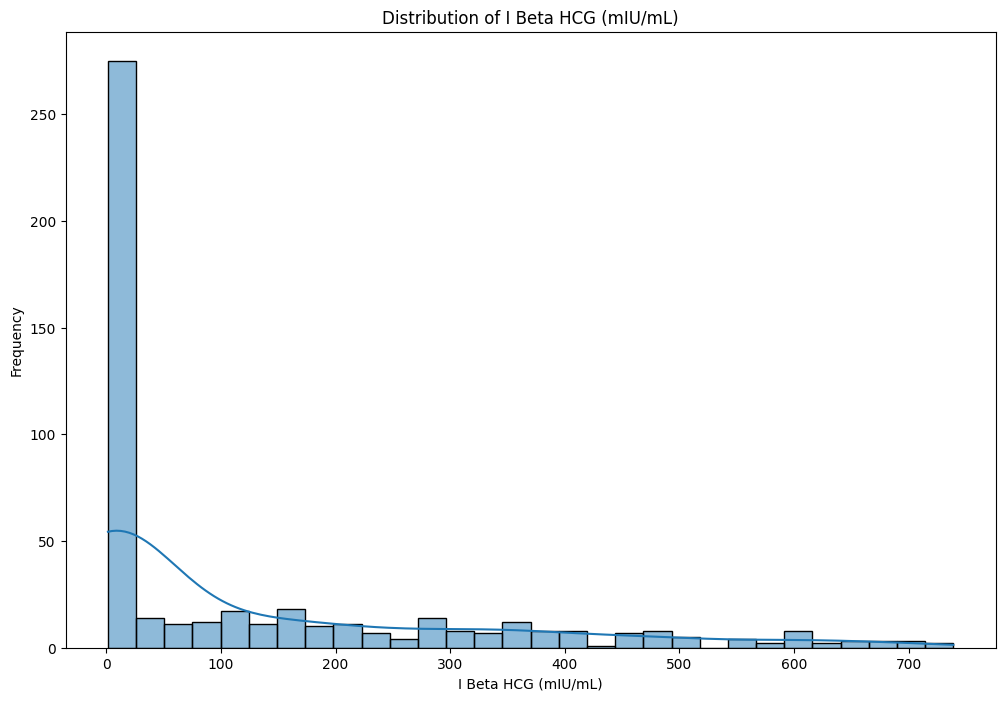

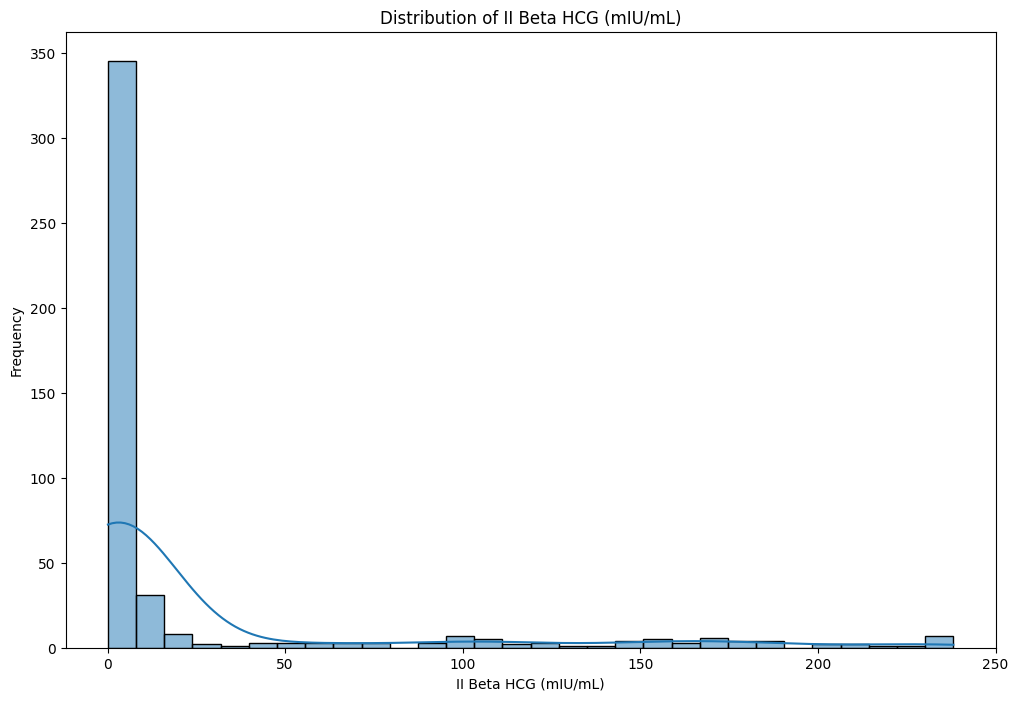

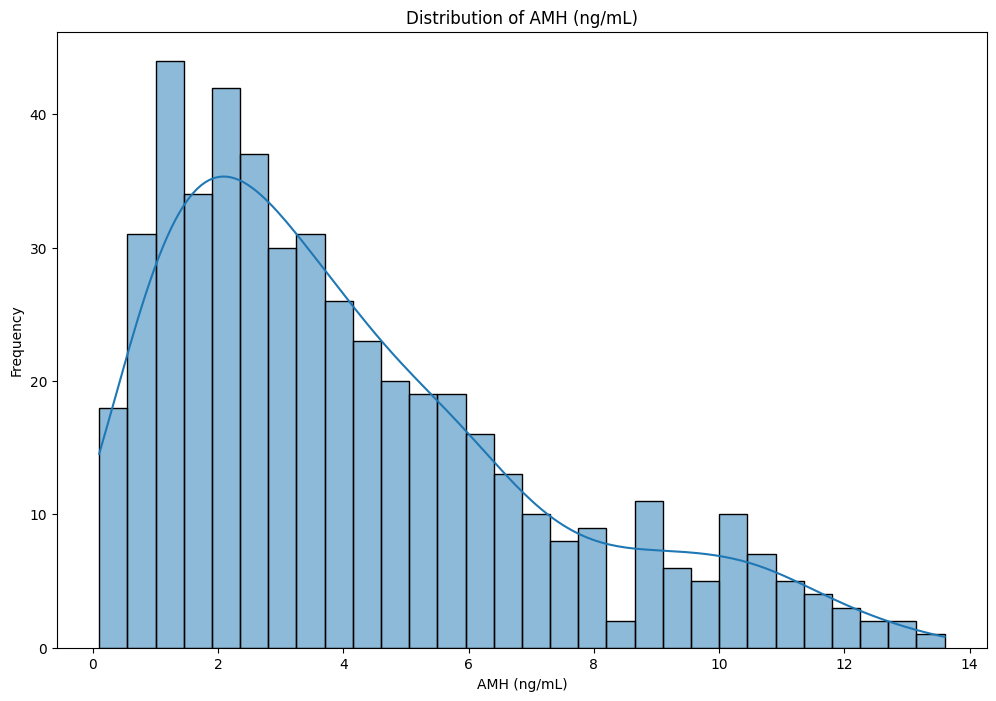

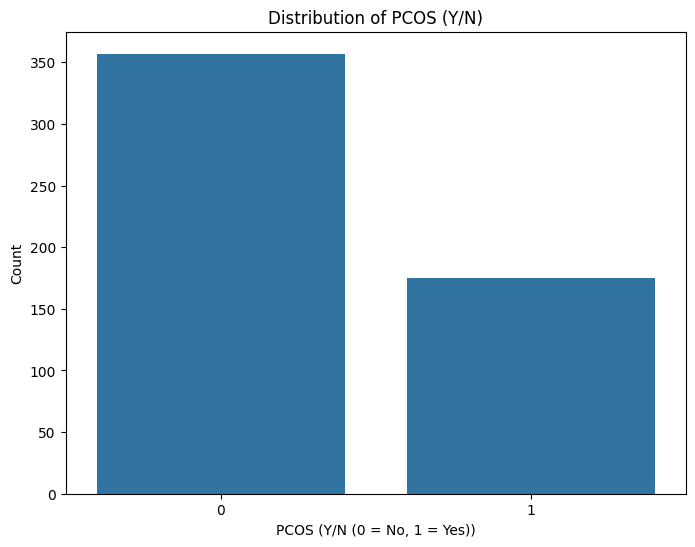

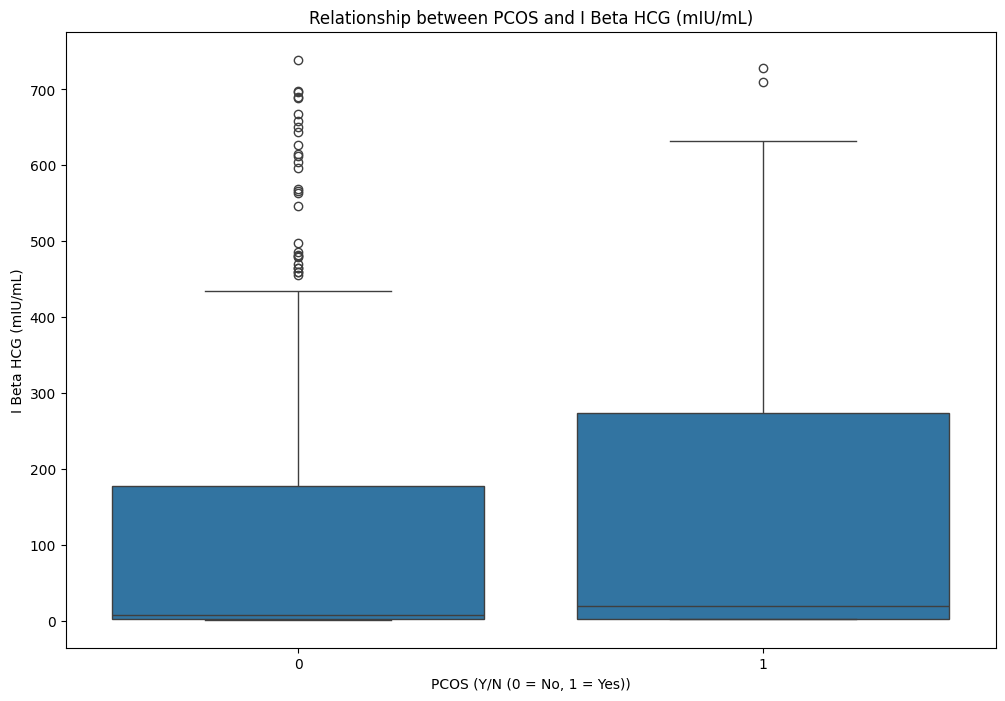

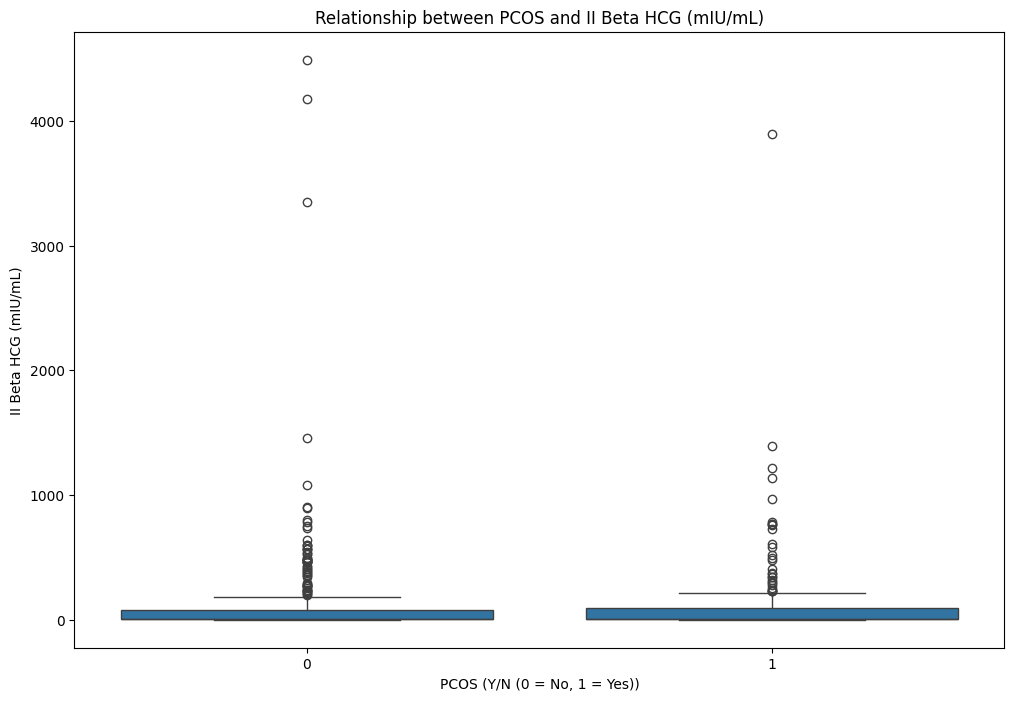

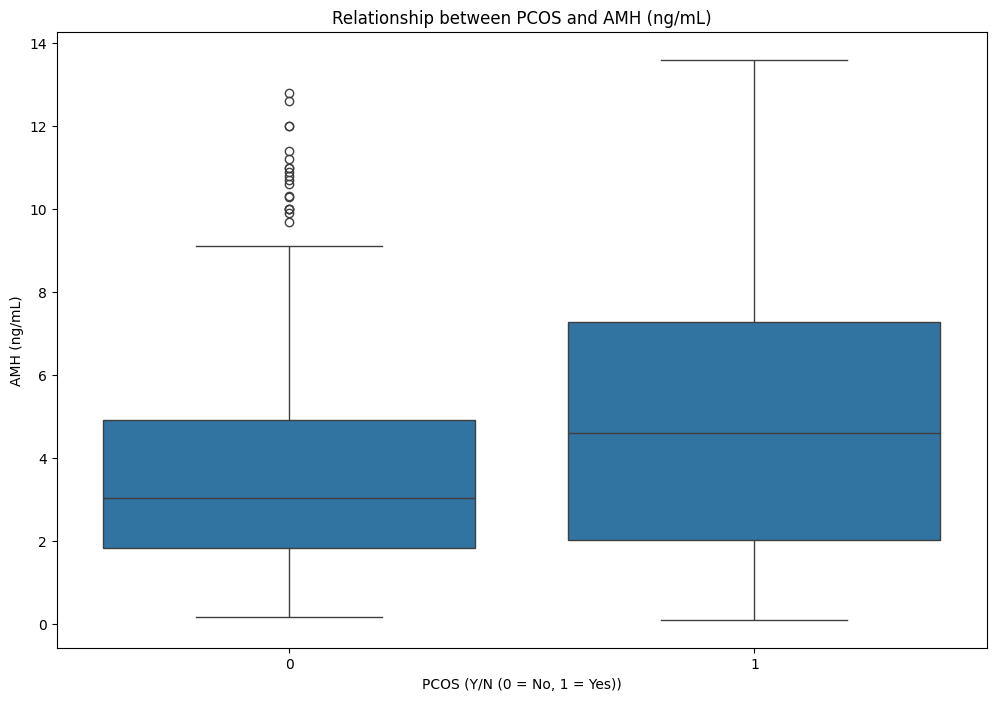

In [ ]:
## Plotting the Data

# The distribution of numerical features - Plt, no outliers
plt.figure(figsize=(12, 8))
sns.histplot(pcos_no_outliers_i_beta_hcg['I_Beta_HCG_mIU_per_mL'], bins=30, kde=True)
plt.title('Distribution of I Beta HCG (mIU/mL)')
plt.xlabel('I Beta HCG (mIU/mL)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(pcos_no_outliers_ii_beta_hcg['II_Beta_HCG_mIU_per_mL'], bins=30, kde=True)
plt.title('Distribution of II Beta HCG (mIU/mL)')
plt.xlabel('II Beta HCG (mIU/mL)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12, 8))
sns.histplot(pcos_no_outliers_amh['AMH_ng_per_mL'], bins=30, kde=True)
plt.title('Distribution of AMH (ng/mL)')
plt.xlabel('AMH (ng/mL)')
plt.ylabel('Frequency')
plt.show()

# The distribution of the target variable (PCOS) - Plt, no outliers
plt.figure(figsize=(8, 6))
sns.countplot(x='PCOS', data=pcos_no_outliers)
plt.title('Distribution of PCOS (Y/N)')
plt.xlabel('PCOS (Y/N (0 = No, 1 = Yes))')
plt.ylabel('Count')
plt.show()

# Relationship between numerical features and PCOS - Plt, no outliers
plt.figure(figsize=(12, 8))
sns.boxplot(x='PCOS', y='I_Beta_HCG_mIU_per_mL', data=pcos_no_outliers_i_beta_hcg)
plt.title('Relationship between PCOS and I Beta HCG (mIU/mL)')
plt.xlabel('PCOS (Y/N (0 = No, 1 = Yes))')
plt.ylabel('I Beta HCG (mIU/mL)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='PCOS', y='II_Beta_HCG_mIU_per_mL', data=pcos_no_outliers_ii)
plt.title('Relationship between PCOS and II Beta HCG (mIU/mL)')
plt.xlabel('PCOS (Y/N (0 = No, 1 = Yes))')
plt.ylabel('II Beta HCG (mIU/mL)')
plt.show()

plt.figure(figsize=(12, 8))
sns.boxplot(x='PCOS', y='AMH_ng_per_mL', data=pcos_no_outliers_amh)
plt.title('Relationship between PCOS and AMH (ng/mL)')
plt.xlabel('PCOS (Y/N (0 = No, 1 = Yes))')
plt.ylabel('AMH (ng/mL)')
plt.show()


# Distribution of numeric features
Includes I Beta HCG, II Beta HCG, and AMH - Removed outliers
 - I Beta HCG: Highest frequency (around 275) at 0-25 mIU/mL and decreases nearly instantly from there to frequency of ~0-25 until ~725 mIU/mL
 - II Beta HCG: Similar trend with the highest frequency (around 345) at ~0-15 mIU/mL and decreases nearly instantly from there to frequency of ~0-15 until ~250 mIU/mL
 - AMH: Peak frequency (~30-35) is around 1-3 ng/mL and slowly decreases steadily until around 8-10 ng/mL where it plateaus, before steadily decreasing again to about 13.5 ng/mL
      

# Distribution of target variable
Target variable is PCOS
  - PCOS: There are more “No” (about 350) to PCOS than “Yes” (about 175)  - aka there are more data points were no PCOS is present

# Relationship between numeric features and target variables
PCOS and I Beta HCG
  - Where PCOS = “Yes”, the box plot shows a higher median and 3rd quartile, as well as a higher maximum. The minimum and 1st quartile seem to be the same in both cohorts (0).  There are a several higher outliers in the PCOS = “No” cohort, and two in the other cohort

PCOS and II Beta HCG
  - Where PCOS = “Yes”, the box plot might have a very slightly higher median and 3rd quartile, however it seems to be less drastic than the I Beta HCG variable comparison. Again, the minimum and 1st quartile are the same (0), and the maximum is also approx. the same in both cohorts. There are several extremely high data outliers in both cohorts, but especially the “No” cohort with 3 points above 3000 mlU/mL (whereas the other cohort has 1 point). They both have several outliers up to around 1500 mlU/mL. Overall, the difference it the two does not look significant when visually analyzing the data, especially compared to the I Beta HCG and AMH graphs.

PCOS and AMH
  - Where PCOS = “Yes”, the box plot shows a higher median, 3rd quartile, and maximum compared to the other cohort. The “Yes” cohort also has a larger interquartile range. Both cohorts have approx. the same 1st quartile (around 2 ng/mL) and same minimum (0 ng/mL). There are no outliers in the “Yes” cohort, however the other cohort has several high outlier data points.

In [ ]:
## NOW just look a I Beta HCG and AMH vs PCOS -> Have to make one DataFrame

# Merge the two outlier DataFrames
pcos_no_outliers_combined = pd.concat([pcos_no_outliers_i_beta_hcg, pcos_no_outliers_amh])

# Reset the index of the combined DataFrame
pcos_no_outliers_combined.reset_index(drop=True, inplace=True)

# Display the combined DataFrame to Check
print(pcos_no_outliers_combined)


# Convert values to strings
pcos_no_outliers_combined['AMH_ng_per_mL'] = pcos_no_outliers_combined['AMH_ng_per_mL'].astype(str)
pcos_no_outliers_combined['I_Beta_HCG_mIU_per_mL'] = pcos_no_outliers_combined['I_Beta_HCG_mIU_per_mL'].astype(str)

# Display the DataFrame to Check
print(pcos_no_outliers_combined)


     Sl_No  Patient_File_No  PCOS  I_Beta_HCG_mIU_per_mL  \
0        1            10001     0                   1.99   
1        2            10002     0                  60.80   
2        3            10003     1                 494.08   
3        4            10004     0                   1.99   
4        6            10006     0                 237.97   
..     ...              ...   ...                    ...   
978    536            10536     0                   1.99   
979    537            10537     0                   1.99   
980    538            10538     0                  80.13   
981    539            10539     0                   1.99   
982    540            10540     0                 292.92   

     II_Beta_HCG_mIU_per_mL AMH_ng_per_mL  
0                      1.99          2.07  
1                      1.99          1.53  
2                    494.08          6.63  
3                      1.99          1.22  
4                      1.99          6.74  
..             

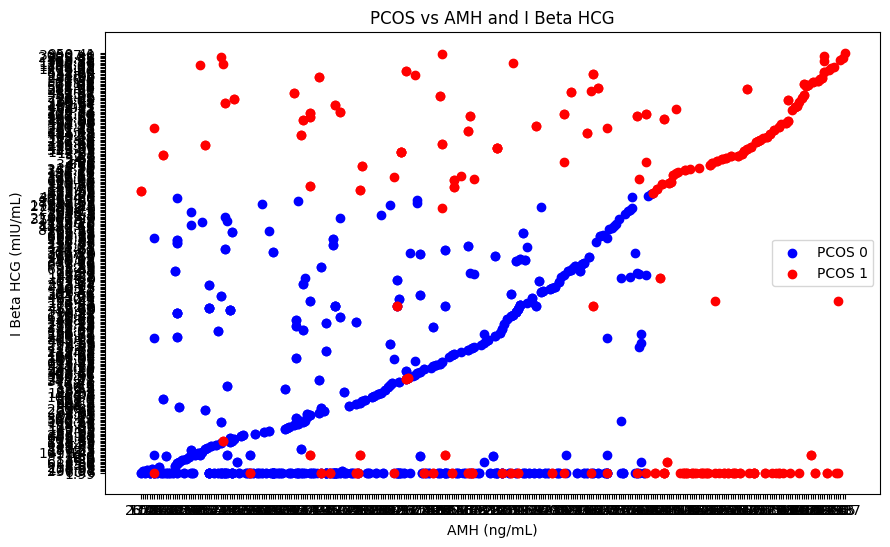

In [ ]:
# Plotting PCOS vs I Beta HCG and AMH

# Define colors for different PCOS values
colors = {0: 'blue', 1: 'red'}

# Plotting PCOS vs AMH vs I Beta HCG
plt.figure(figsize=(10, 6))
for pcos_value, color in colors.items():
    subset = pcos_no_outliers_combined[pcos_no_outliers_combined['PCOS'] == pcos_value]
    plt.scatter(subset['AMH_ng_per_mL'], subset['I_Beta_HCG_mIU_per_mL'], color=color, label=f'PCOS {pcos_value}')

plt.xlabel('AMH (ng/mL)')
plt.ylabel('I Beta HCG (mIU/mL)')
plt.title('PCOS vs AMH and I Beta HCG')
plt.legend()

plt.show()

In [ ]:
pcos_no_outliers_combined


,Sl_No,Patient_File_No,PCOS,I_Beta_HCG_mIU_per_mL,II_Beta_HCG_mIU_per_mL,AMH_ng_per_mL
0,1,10001,0,1.99,1.99,2.07
1,2,10002,0,60.8,1.99,1.53
2,3,10003,1,494.08,494.08,6.63
3,4,10004,0,1.99,1.99,1.22
4,6,10006,0,237.97,1.99,6.74
...,...,...,...,...,...,...
978,536,10536,0,1.99,1.99,7.6
979,537,10537,0,1.99,1.99,1.7
980,538,10538,0,80.13,1.99,5.6
981,539,10539,0,1.99,1.99,3.7


ABOVE: A clear point is seen where at a certain AMH level the PCOS = 1 (yes) and a certain level where the I Beta HCG = 1 (yes)

From this we can infer that once a certain level of I Beta HCG or AMH is reached, PCOS will be positive (yes)

Furthermore, there is a likely chance if hormone levels are both below that threshold the PCOS will be negative (however there might be higher chance of false negatives)

# Our Statment Idea:
We can predict the likelihood of PCOS based on elevated hormone measurements of AMH and I Beta HCG obtained from patient data. We believe that at a certain elevated threshold of these hormones, the PCOS results will be positive. If both hormones are below that level it is likely the PCOS will be negative, however there are likey to be a higher chance of false negatives

# Our Objective:
Develop a predictive model that can accurately classify whether a patient is likely to have PCOS or not based on their hormone measurements of AMH and I Beta HCG

Using https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html as a blueprint to find which model provides the best predictions

## Summary of work below:
I've taken the PCOS dataset without outliners as our training set and created 3 different machine learning models to predict our dataset. After training, I evaluated the mean square error (MSE) to see how wrong the training data is and R^2 values to see how well the training data fits the model. The goal is to get the mean square error as close to 0 and R^2 as close to 1.
1. Linear Regression Model
  * MSE values range from 0.18-0.25
  * R^2 values range <0.08
2. Ridge Regression Model
  * MSE values range from 0.18-0.25
  * R^2 values range <0.08
3. Random Forrest Regression Model
  * MSE values range from 0.10-0.13
  * R^2 values range from 0.35-0.55

### Findings:
  1. The Random Forrest Regression Model yield way better predictions than the Linear Regression Model and the Ridge Regression Model.
  2. Both the Linear Regression Model and Ridge Regression Model yield around the same results in terms of MSE and R^2 values.

### Future plans to make model/predictions better:
 1. Remove certain outliers


Mean Squared Error: 4582257.50165918
Mean Absolute Error: 414.2774471692001
R^2 Score: 0.0027961935202244215


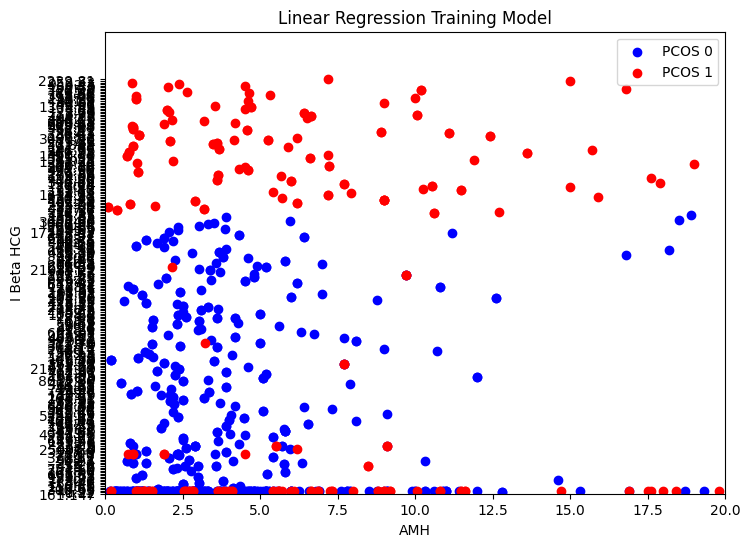

In [ ]:
# Linear Regression Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression

# Split the data
X_unfiltered = pcos_no_outliers_combined.drop(['Sl_No', 'Patient_File_No', 'I_Beta_HCG_mIU_per_mL'], axis=1)
for column in X_unfiltered.columns:
  X_unfiltered[column] = pd.to_numeric(X_unfiltered[column], errors='coerce')
nan_rows = X_unfiltered[X_unfiltered.isna().any(axis=1)].index

# Filtering out rows that aren't numbers and retaining size structure
X = X_unfiltered.drop(nan_rows)
y = pcos_no_outliers_combined['I_Beta_HCG_mIU_per_mL'].drop(nan_rows)

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create Linear Regression model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

# Predict the model
y_pred = lr_model.predict(X_test)

# Evaluate the model
lr_model.score(X_test, y_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print('Mean Squared Error:', mse)
print('Mean Absolute Error:', mae)
print('R^2 Score:', r2)


xy_train = pd.concat([X_train, y_train], axis=1)

plt.figure(figsize=(8, 6))
for pcos_value, color in colors.items():
    xy_train_subset = xy_train[xy_train['PCOS'] == pcos_value]
    plt.scatter(xy_train_subset['AMH_ng_per_mL'], xy_train_subset['I_Beta_HCG_mIU_per_mL'], color=color, label=f'PCOS {pcos_value}')

plt.title("Linear Regression Training Model")
plt.xlabel('AMH')
plt.ylabel('I Beta HCG')
plt.ylim([0,300])
plt.xlim([0,20])
plt.legend()
plt.show()

Mean Squared Error: 449010.0460925829
Mean Absolute Error: 310.7355933891803
R^2 Score: 0.32093992085856626


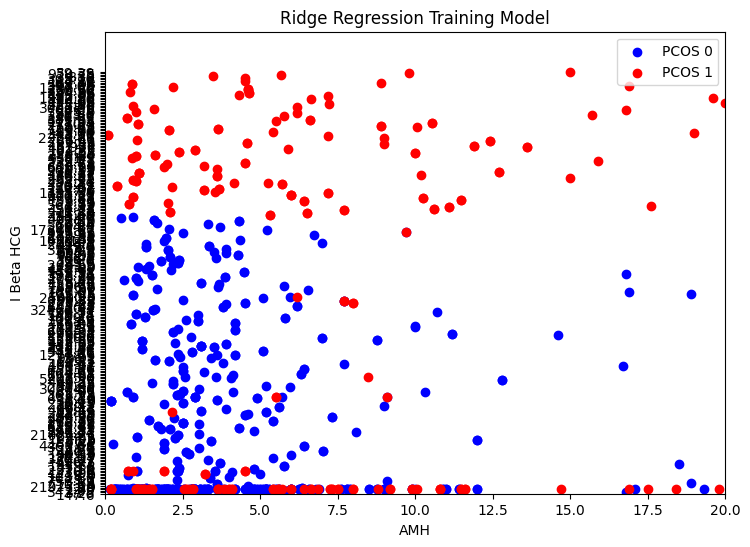

In [ ]:
# Ridge Regression Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import Ridge


# Split the data
X_unfiltered = pcos_no_outliers_combined.drop(['Sl_No', 'Patient_File_No', 'I_Beta_HCG_mIU_per_mL'], axis=1)
for column in X_unfiltered.columns:
  X_unfiltered[column] = pd.to_numeric(X_unfiltered[column], errors='coerce')
nan_rows = X_unfiltered[X_unfiltered.isna().any(axis=1)].index

# Filtering out rows that aren't numbers and retaining size structure
X = X_unfiltered.drop(nan_rows)
y = pcos_no_outliers_combined['I_Beta_HCG_mIU_per_mL'].drop(nan_rows)


# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create Ridge Regression model
rr_model = Ridge()

# Train the model
rr_model.fit(X_train, y_train)

# Predict the model
y_pred = rr_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print('Mean Absolute Error:', mae)
print(f'R^2 Score: {r2}')
xy_train = pd.concat([X_train, y_train], axis=1)

# Training the model
plt.figure(figsize=(8, 6))
for pcos_value, color in colors.items():
    xy_train_subset = xy_train[xy_train['PCOS'] == pcos_value]
    plt.scatter(xy_train_subset['AMH_ng_per_mL'], xy_train_subset['I_Beta_HCG_mIU_per_mL'], color=color, label=f'PCOS {pcos_value}')

plt.title("Ridge Regression Training Model")
plt.xlabel('AMH')
plt.ylabel('I Beta HCG')
plt.ylim([0,300])
plt.xlim([0,20])
plt.legend()
plt.show()


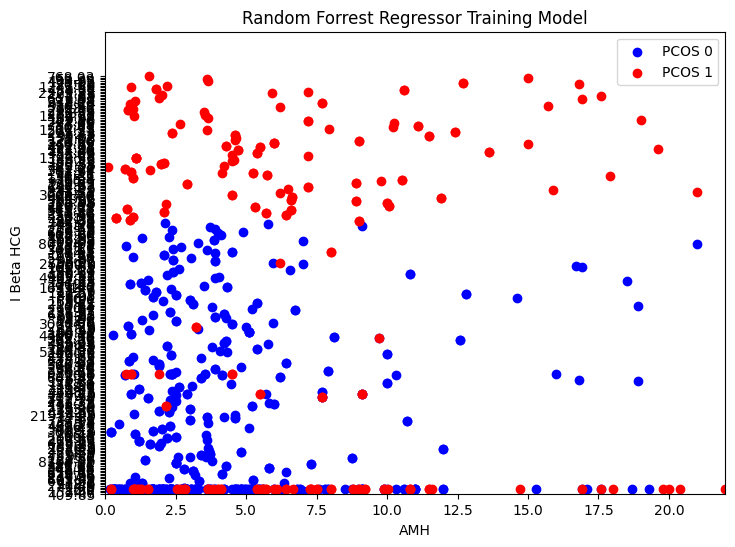

Mean Squared Error: 5553609.157566095
Mean Absolue Error: 330.323208388364
R^2 Score: 0.22683385015646962


In [ ]:
# Random Forest Regression Model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Split the data
X_unfiltered = pcos_no_outliers_combined.drop(['Sl_No', 'Patient_File_No', 'I_Beta_HCG_mIU_per_mL'], axis=1)
for column in X_unfiltered.columns:
  X_unfiltered[column] = pd.to_numeric(X_unfiltered[column], errors='coerce')
nan_rows = X_unfiltered[X_unfiltered.isna().any(axis=1)].index

# Filtering out rows that aren't numbers and retaining size structure
X = X_unfiltered.drop(nan_rows)
y = pcos_no_outliers_combined['I_Beta_HCG_mIU_per_mL'].drop(nan_rows)

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create Random Forest Regressor model
rf_model = RandomForestRegressor()

# Train the model
rf_model.fit(X_train, y_train)

# Predict the model
y_pred = rf_model.predict(X_test)

# Evaluate the model
rf_model.score(X_test, y_test)


xy_train = pd.concat([X_train, y_train], axis=1)

plt.figure(figsize=(8, 6))
for pcos_value, color in colors.items():
    xy_train_subset = xy_train[xy_train['PCOS'] == pcos_value]
    plt.scatter(xy_train_subset['AMH_ng_per_mL'], xy_train_subset['I_Beta_HCG_mIU_per_mL'], color=color, label=f'PCOS {pcos_value}')

plt.title("Random Forrest Regressor Training Model")
plt.xlabel('AMH')
plt.ylabel('I Beta HCG')
plt.ylim([0,300])
plt.xlim([0,22])
plt.legend()
plt.show()


mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

metricsDf = pd.DataFrame(data={"actual values": y_test,
                                "predicted values": y_pred})
# metricsDf["differences"] = metricsDf["predicted values"] - metricsDf["actual values"]
# print(metricsDf.head(20))
print('Mean Squared Error:', mse)
print('Mean Absolue Error:', mae)
print('R^2 Score:', r2)

In [ ]:
pcos_no_outliers_combined.columns

Index(['Sl_No', 'Patient_File_No', 'PCOS', 'I_Beta_HCG_mIU_per_mL',
       'II_Beta_HCG_mIU_per_mL', 'AMH_ng_per_mL'],
      dtype='object')